In [1]:
from add_parent_dir import *
from automorphisms import *
from utils.qec import *
from utils.qiskit import *
from magma_interface import *
from ZX_dualities import *
from XY_dualities import *
import pickle

## [[7,1,3]] - Steane code

#### Define code

In [2]:
n = 7
k = 1 
d = 3
H =np.array([[1,0,0,1,0,1,1],
             [0,1,0,1,1,0,1],
             [0,0,1,0,1,1,1]])
zeros = np.zeros_like(H)
H_symp = np.array(np.vstack((np.hstack((H,zeros)),np.hstack((zeros,H)))),dtype=int)

#### Automorphism group generators from MAGMA

In [3]:
#code_auts_dict = qec_code_auts_from_magma_with_intersection(n,k,d,H_symp).run(fileroot='./auts_data/')
filename = f'./auts_data/auts_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  1008
Time:  0.01
No of aut gens:  6


In [4]:
auts = code_auts_dict['auts']
circuits = []
symp_mats = []
for num, aut in enumerate(auts):
    phys_act = circ_from_aut(H_symp,aut)        
    phys_circ, _ = phys_act.circ()
    log_act = logical_circ_and_pauli_correct(H_symp,phys_circ)
    circ = log_act.run()
    circuits.append(circ)
    symp_mats.append(log_act.U_logical_act())

In [5]:
# save circuits
filename = f'./auts_data/circs_n{n}k{k}d{d}.pkl'
with open(filename, 'wb') as f:
    pickle.dump(circuits, f)

In [6]:
# save symp_mats
filename = f'./auts_data/symp_mats_n{n}k{k}d{d}.pkl'
with open(filename, 'wb') as f:
    pickle.dump(symp_mats, f)

## Circuit 1

[]


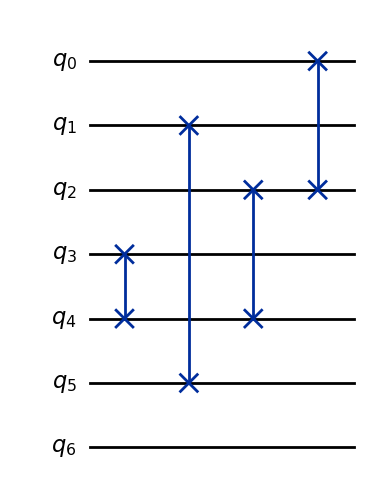

In [7]:
# physical circuit
circ = circuits[0]
print(circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

## Circuit 2

Logical Act: []


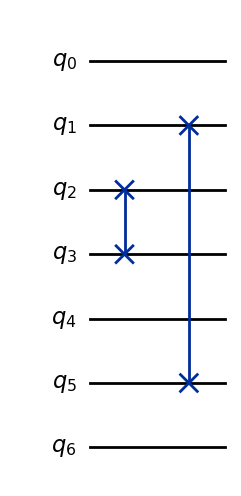

In [8]:
circ = circuits[1]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

## Circuit 3

Logical Act: [('S', 1)]


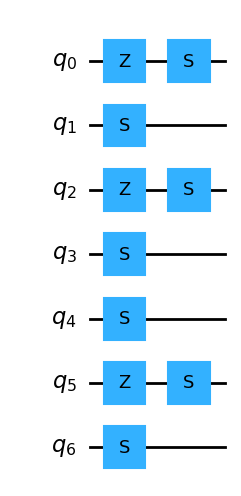

In [9]:
circ = circuits[2]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

## Circuit 4

Logical Act: [('H', 1), ('Xsqrt', 1)]


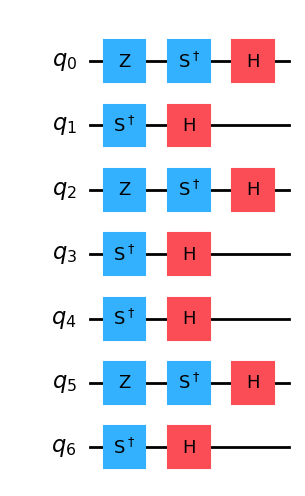

In [10]:
circ = circuits[3]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

## Circuit 5

Logical Act: []


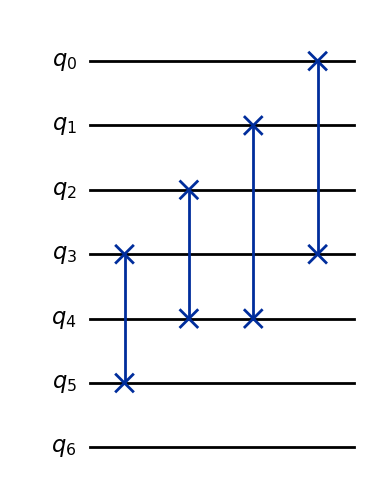

In [11]:
circ = circuits[4]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

## Circuit 6

Logical Act: []


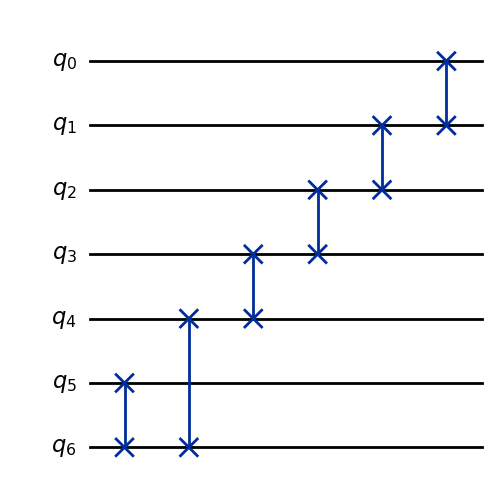

In [12]:
circ = circuits[5]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

# ZX duality

In [13]:
#code_auts_dict = qec_code_ZX_dualities_from_magma_with_intersection(n,k,d,H_symp).run(fileroot='./auts_data/')
filename = f'./auts_data/ZX_dualities_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  336
Time:  0.01
No of aut gens:  6


In [14]:
auts = code_auts_dict['auts']
circuits = []
for num, aut in enumerate(auts):
    #print('Aut Gen',num)
    phys_act = circ_from_ZX_duality(H_symp,aut)        
    phys_circ, _ = phys_act.circ()
    circ = logical_circ_and_pauli_correct(H_symp,phys_circ).run()
    circuits.append(circ)

Logical Act: [('H', 1)]


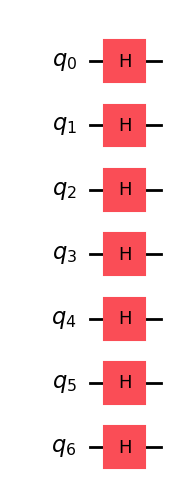

In [15]:
circ = circuits[2]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

# XY duality

In [16]:
#code_auts_dict = qec_code_XY_dualities_from_magma_with_intersection(n,k,d,H_symp).run(fileroot='./auts_data/')
filename = f'./auts_data/XY_dualities_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  336
Time:  0.01
No of aut gens:  5


In [17]:
auts = code_auts_dict['auts']
circuits = []
for num, aut in enumerate(auts):
    #print('Aut Gen',num)
    phys_act = circ_from_XY_duality(H_symp,aut)        
    phys_circ, _ = phys_act.circ()
    circ = logical_circ_and_pauli_correct(H_symp,phys_circ).run()
    circuits.append(circ)

Logical Act: [('S', 1)]


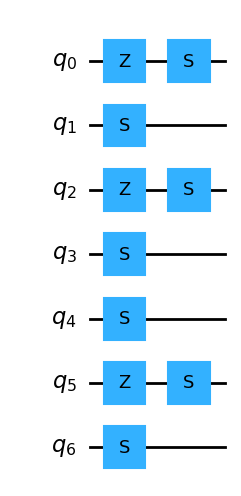

In [18]:
circ = circuits[2]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')